In [45]:
#what will be this project about?

In [46]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.impute import SimpleImputer

In [47]:
# STEP 1: Load the dataset

print("STEP 1: Loading data...")
df = pd.read_csv('training.csv', index_col=0, encoding='ascii')
print(f"Data shape: {df.shape}")

STEP 1: Loading data...
Data shape: (640840, 9)


In [48]:
print(df.head())

        store_ID  day_of_week        date  nb_customers_on_day  open  \
425390       366            4  2013-04-18                  517     1   
291687       394            6  2015-04-11                  694     1   
411278       807            4  2013-08-29                  970     1   
664714       802            2  2013-05-28                  473     1   
540835       726            4  2013-10-10                 1068     1   

        promotion state_holiday  school_holiday  sales  
425390          0             0               0   4422  
291687          0             0               0   8297  
411278          1             0               0   9729  
664714          1             0               0   6513  
540835          1             0               0  10882  


In [49]:
print(df.tail())

        store_ID  day_of_week        date  nb_customers_on_day  open  \
359783       409            6  2013-10-26                  483     1   
152315        97            1  2014-04-14                  987     1   
117952       987            1  2014-07-07                  925     1   
435829      1084            4  2014-06-12                  725     1   
305711       695            7  2015-05-03                    0     0   

        promotion state_holiday  school_holiday  sales  
359783          0             0               0   4553  
152315          1             0               0  12307  
117952          0             0               0   6800  
435829          0             0               0   5344  
305711          0             0               0      0  


In [50]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 640840 entries, 425390 to 305711
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   store_ID             640840 non-null  int64 
 1   day_of_week          640840 non-null  int64 
 2   date                 640840 non-null  object
 3   nb_customers_on_day  640840 non-null  int64 
 4   open                 640840 non-null  int64 
 5   promotion            640840 non-null  int64 
 6   state_holiday        640840 non-null  object
 7   school_holiday       640840 non-null  int64 
 8   sales                640840 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 48.9+ MB
None


In [51]:
print(df.describe())

            store_ID    day_of_week  nb_customers_on_day           open  \
count  640840.000000  640840.000000        640840.000000  640840.000000   
mean      558.211348       4.000189           633.398577       0.830185   
std       321.878521       1.996478           464.094416       0.375470   
min         1.000000       1.000000             0.000000       0.000000   
25%       280.000000       2.000000           405.000000       1.000000   
50%       558.000000       4.000000           609.000000       1.000000   
75%       837.000000       6.000000           838.000000       1.000000   
max      1115.000000       7.000000          5458.000000       1.000000   

           promotion  school_holiday          sales  
count  640840.000000   640840.000000  640840.000000  
mean        0.381718        0.178472    5777.469011  
std         0.485808        0.382910    3851.338083  
min         0.000000        0.000000       0.000000  
25%         0.000000        0.000000    3731.000000  


In [52]:
#Step 2: Calculate Correlation and Plot Corr.Matrix
# Drop all non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.drop('sales', axis=1, inplace=True)
df_numeric.head()


,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday
425390,366,4,517,1,0,0
291687,394,6,694,1,0,0
411278,807,4,970,1,1,0
664714,802,2,473,1,1,0
540835,726,4,1068,1,1,0


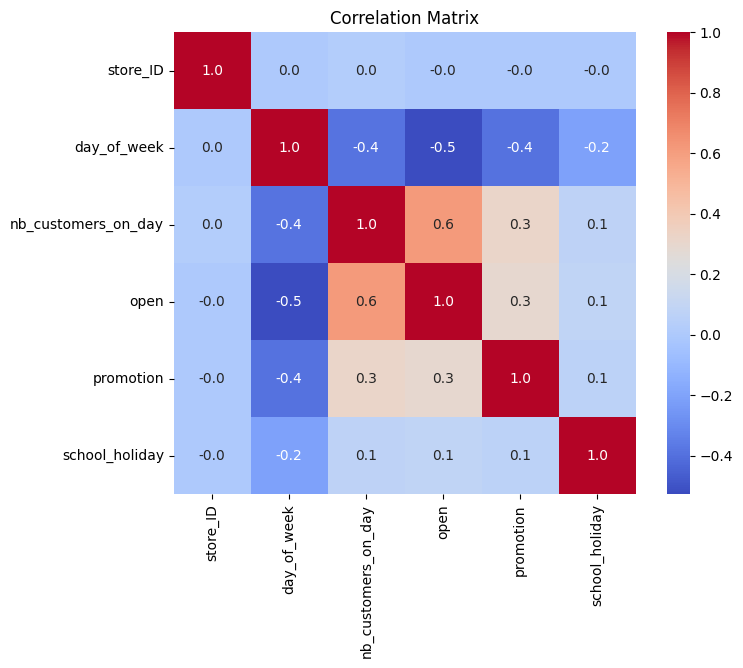

In [53]:
#print the matrix
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


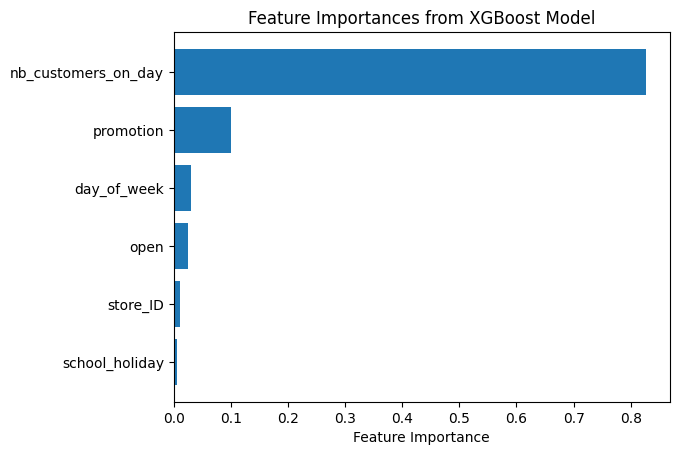

In [54]:
# Prepare the data
X = df_numeric._get_numeric_data()
y = df.sales

# Define the model
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Fit the model to the data
model.fit(X, y)

# Now you can access the feature importances
sort_idx = model.feature_importances_.argsort()

importances = model.feature_importances_[sort_idx]
feature_names = X.columns if hasattr(X, 'columns') else range(X.shape[1])

# Plot the feature importances
plt.barh(feature_names[sort_idx], importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importances from XGBoost Model")
plt.show()


In [55]:
df.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
425390,366,4,2013-04-18,517,1,0,0,0,4422
291687,394,6,2015-04-11,694,1,0,0,0,8297
411278,807,4,2013-08-29,970,1,1,0,0,9729
664714,802,2,2013-05-28,473,1,1,0,0,6513
540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [56]:
# STEP 2: Simple data cleaning
print("\nSTEP 2: Cleaning data...")

# Remove ID (or other name it could have) column if it exists
print(df.isnull().sum())

# drop unnamed
#df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()




STEP 2: Cleaning data...
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64


,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
425390,366,4,2013-04-18,517,1,0,0,0,4422
291687,394,6,2015-04-11,694,1,0,0,0,8297
411278,807,4,2013-08-29,970,1,1,0,0,9729
664714,802,2,2013-05-28,473,1,1,0,0,6513
540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [57]:
print(df.iloc[:,-1:])

        sales
425390   4422
291687   8297
411278   9729
664714   6513
540835  10882
...       ...
359783   4553
152315  12307
117952   6800
435829   5344
305711      0

[640840 rows x 1 columns]


In [58]:
df.drop('date', axis=1, inplace=True)

df = pd.concat([df, pd.get_dummies(df['state_holiday'], prefix='SH')], axis=1)

print(df.head())





        store_ID  day_of_week  nb_customers_on_day  open  promotion  \
425390       366            4                  517     1          0   
291687       394            6                  694     1          0   
411278       807            4                  970     1          1   
664714       802            2                  473     1          1   
540835       726            4                 1068     1          1   

       state_holiday  school_holiday  sales  SH_0   SH_a   SH_b   SH_c  
425390             0               0   4422  True  False  False  False  
291687             0               0   8297  True  False  False  False  
411278             0               0   9729  True  False  False  False  
664714             0               0   6513  True  False  False  False  
540835             0               0  10882  True  False  False  False  


In [59]:
df.drop('state_holiday', axis=1, inplace=True)
X = df.drop('sales', axis=1)
y = df['sales']


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# split data an init model
model = LinearRegression()
scaler = StandardScaler()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [61]:
# Model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")





Mean Squared Error (MSE): 2200939.1483
R-squared (R²): 0.8511
Mean Squared Error (MSE): 2200939.1483
Mean Absolute Error (MAE): 980.2598


In [ ]:
#import the REAL_DATA.csv
real_df = pd.read_csv('REAL_DATA.csv', index_col=0, encoding='ascii')

#cleaning -> step 2
real_df.drop('date', axis=1, inplace=True)
real_df = pd.concat([real_df, pd.get_dummies(real_df['state_holiday'], prefix='SH')], axis=1)
real_df.drop('state_holiday', axis=1, inplace=True)

print(real_df.head())

        store_ID  day_of_week  nb_customers_on_day  open  promotion  \
index                                                                 
272371       415            7                    0     0          0   
558468        27            7                    0     0          0   
76950        404            3                  657     1          1   
77556        683            2                  862     1          0   
456344       920            3                  591     1          1   

        school_holiday  SH_0   SH_a   SH_b   SH_c  
index                                              
272371               0  True  False  False  False  
558468               0  True  False  False  False  
76950                0  True  False  False  False  
77556                0  True  False  False  False  
456344               0  True  False  False  False  


In [63]:
# make predictions
y_real = model.predict(real_df)
# add predictions to test data
real_df['sales'] = y_real
# write to .csv file
real_df.to_csv('test_with_predictions.csv', index=False)



c:\Users\Georg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


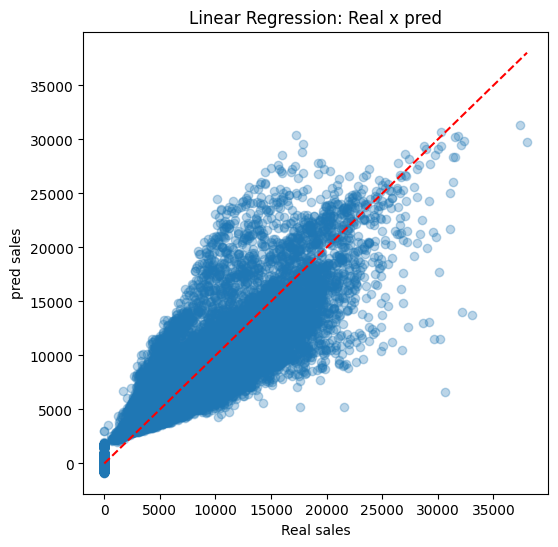

In [64]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, model.predict(X_test), alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # linha perfeita
plt.xlabel("Real sales")
plt.ylabel("pred sales")
plt.title("Linear Regression: Real x pred")
plt.show()